In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

In [9]:
data = pd.read_csv('data/full_data.csv')
data['preco'].describe()

count        21.000000
mean      68406.818390
std       52933.670291
min       17800.000000
25%       32000.000000
50%       56000.000000
75%       70000.000000
max      198000.000000
Name: preco, dtype: float64

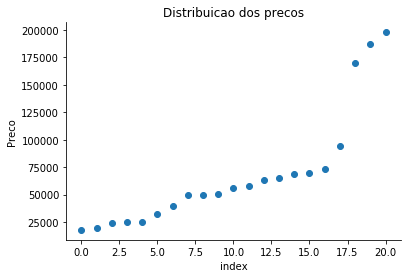

In [12]:
plt.scatter(range(data.shape[0]), np.sort(data['preco'].values))
plt.xlabel('index')
plt.ylabel('Preco')
plt.title("Distribuicao dos precos")
sns.despine()

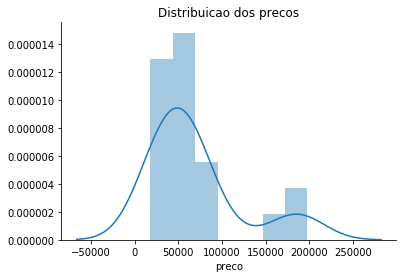

In [14]:
sns.distplot(data['preco'])
plt.title("Distribuicao dos precos")
sns.despine()

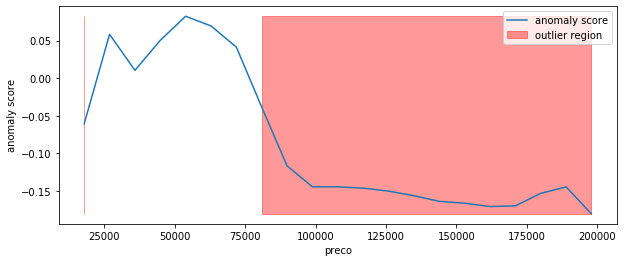

In [16]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data['preco'].values.reshape(-1, 1))
xx = np.linspace(data['preco'].min(), data['preco'].max(), len(data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('preco')
plt.show();